# BDTA Lesson 14: Graphing Words

This lesson looks at using *matplotlib* to graph the occurences of words.

It is based partly on the [Art of Literary Text Analysis: Getting Graphical](https://github.com/sgsinclair/alta/blob/6dd71da5377217cdee85efba384c8bf66936ab82/ipynb/GettingGraphical.ipynb). See also the documentation for [matplotlib](https://matplotlib.org/).

## Getting Things Ready
First we need to import what we need from *matplotlib* and make sure it is displayed inline.

In [ ]:
import matplotlib.pyplot as plt
import nltk

# make sure that graphs are embedded into our notebook output
%matplotlib inline

We can now try to create an empty plot.

[]

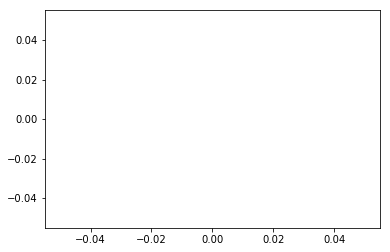

In [84]:
plt.plot() # create an empty graph

## Getting a Text and Tokenizing It

Now we open a text and tokenize it.

In [2]:
ls *.txt

FullText.txt                performanceConcordance.txt
Hume Enquiry.txt            theWritingStory.txt
StoryOfWriting.txt          truthConcordance.txt
bigdata.txt


In [3]:
theText2Use = "Hume Enquiry.txt"
with open(theText2Use, "r") as fileToRead:
    theString = fileToRead.read()
    
print("This string has", len(theString), "characters.")
print(theString[:50])

This string has 366798 characters.
The Project Gutenberg EBook of An Enquiry Concerni


In [6]:
humeTokensLow = nltk.word_tokenize(theString.lower())

# Filter out tokens that aren't words
humeWordTokensLow = [word for word in humeTokensLow if word[0].isalpha()]

# Determine frequencies
humeWordTokensLowFreq = nltk.FreqDist(humeWordTokensLow)

# preview the top 20 frequencies
humeWordTokensLowFreq.tabulate(10)

  the    of   and    to     a    in  that    is    it which 
 3499  2848  2210  1809  1165  1117  1002   955   786   750 


## Plotting Word Frequencies

We can use NLTK's ability to plot things like frequencies.

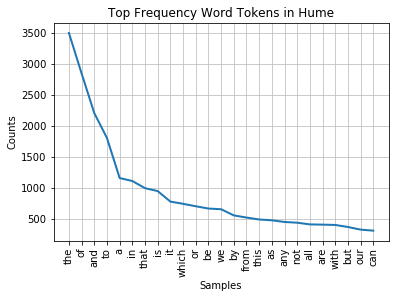

In [7]:
# plot the top frequency words in a graph
humeWordTokensLowFreq.plot(25, title="Top Frequency Word Tokens in Hume")

**Content Words**: now we can repeat the process but remove stopwords.

In [85]:
# Get the English stopwords from nltk
stopwords = nltk.corpus.stopwords.words("English")

# Remove stopwords to get a new list of tokens
humeContentWordTokensLow = [word for word in humeWordTokensLow if word not in stopwords]

# Create a nltk frequency distribution object
humeContentWordTokensLowFreq = nltk.FreqDist(humeContentWordTokensLow)

# Show the most common words
humeContentWordTokensLowFreq.most_common(20)

[('may', 295),
 ('one', 203),
 ('nature', 200),
 ('must', 177),
 ('us', 169),
 ('experience', 166),
 ('cause', 157),
 ('human', 149),
 ('mind', 145),
 ('never', 125),
 ('effect', 124),
 ('every', 122),
 ('ideas', 120),
 ('objects', 120),
 ('idea', 116),
 ('reason', 116),
 ('reasoning', 109),
 ('upon', 104),
 ('power', 103),
 ('though', 102)]

And now we can plot the high frequency words. Note how the curve of this plot is different from the last one.

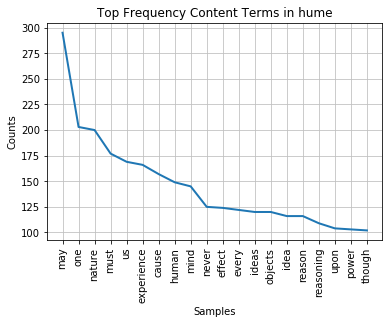

In [87]:
humeContentWordTokensLowFreq.plot(20, title="Top Frequency Content Terms in hume")

We can also get a dispersion plot if we create a nltk text object.

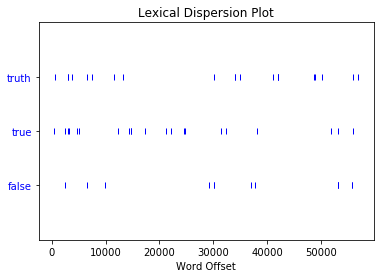

In [44]:
humeText = nltk.Text(humeWordTokensLow)
humeText.dispersion_plot(["truth","true", "false"])

## Graphing Word Trends

What if we want to graph a word over the span of the text to see how it trends? To do that we need to:
* Divide the text into as many sections as we want to graph.
* Calculate the frequency for each section.
* Plot the trend over the sections.

First we will figure out how many words there are in each section.

In [88]:
numWords = len(humeWordTokensLow)
sections = 10
numSectWords = int(numWords/sections)
print(numSectWords)

5987


Knowing how many words there are total, how many sections and how many words per section, we can now get the frequency for each section and put it into a list.

In [91]:
word2Graph = "truth" # This is the word to track
freqsOfWord = [] # This is the list for the frequencies for each section
for n in range(10):
    startSearch = n * numSectWords # Calculate the index of the start of the section
    stopSearch = startSearch + numSectWords - 1 # Calculate the end of the section
    # Get the frequency of the word in the section and append to list
    freqsOfWord.append(humeWordTokensLow[startSearch:stopSearch].count(word2Graph)) 
    
# Here we check the list
print(freqsOfWord)

# We can also compare the sum of the list to the total frequency to check
print("Check that", str(sum(freqsOfWord)), "should equal", str(humeWordTokensLow.count(word2Graph)))

[4, 3, 1, 0, 0, 4, 1, 3, 3, 2]
Check that 21 should equal 21


And now we can graph the trend list.

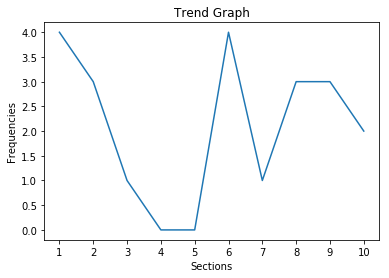

In [39]:
plt.plot(freqsOfWord) # Describe the plot.

plt.xlabel('Sections') # X Axis Label
plt.ylabel('Frequencies') # Y Axis Label
plt.title('Trend Graph') # Plot Title
plt.xticks(range(10), range(1,11)) # Relabeling the X-Axis ticks to start with 1

plt.show() # Show the plot.

## Exercise: Graphing More Than a Word

Can you plot more than one trend in the same visualization? To do this you should try to create a function that generates the list of frequencies. Then you can graph more than one list in the same plot.

In [65]:
# Here is the shell of a function
def getFreqs(theWord2Count,theTokens2Use,theSections):
    # ... stuff goes here to calculate the frequencies
    return(freqsOfTargetWord)

In [67]:
# We can then test the function
getFreqs("false",humeWordTokensLow,20)

[1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 2, 0, 2, 0, 0, 0, 0, 3, 2, 0]

In [ ]:
plt.plot() # You need to pass the first word list here
plt.plot() # You need to pass the second word list here

plt.show()

**Optional Bonus**: 
* Can you create a histogram using matplotlip. 
* Can you create a bar graph of the data.